In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [5]:
termInfo = pd.read_csv("/home/lifengchao/下载/term.csv",encoding="gbk")

In [6]:
termInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 8 columns):
终端IP    1014 non-null object
设备IP    1014 non-null object
厂商      1014 non-null object
终端类型    1014 non-null object
终端型号    7 non-null object
组织关系    1014 non-null object
地理位置    0 non-null float64
描述      0 non-null float64
dtypes: float64(2), object(6)
memory usage: 63.5+ KB


In [7]:
termInfo.head()

,终端IP,设备IP,厂商,终端类型,终端型号,组织关系,地理位置,描述
0,19.19.0.1,10.24.6.13,融城互通,热点,NaN,/北京/,NaN,NaN
1,40.40.0.101,10.24.6.13,思博伦,探针,NaN,/北京/,NaN,NaN
2,40.40.0.102,10.24.6.13,思博伦,探针,NaN,/北京/,NaN,NaN
3,40.40.0.103,10.24.6.13,思博伦,探针,NaN,/北京/,NaN,NaN
4,40.40.0.104,10.24.6.13,思博伦,探针,NaN,/北京/,NaN,NaN


In [8]:
termInfo.isnull().any()

终端IP    False
设备IP    False
厂商      False
终端类型    False
终端型号     True
组织关系    False
地理位置     True
描述       True
dtype: bool

In [9]:
termInfo.isnull().sum()

终端IP       0
设备IP       0
厂商         0
终端类型       0
终端型号    1007
组织关系       0
地理位置    1014
描述      1014
dtype: int64

In [10]:
#del termInfo["终端型号"]
#del termInfo["组织关系"]
#del termInfo["地理位置"]
#del termInfo["描述"]
termInfo.drop(columns=["终端型号","组织关系","地理位置","描述"],inplace=True)
termInfo.head()

,终端IP,设备IP,厂商,终端类型
0,19.19.0.1,10.24.6.13,融城互通,热点
1,40.40.0.101,10.24.6.13,思博伦,探针
2,40.40.0.102,10.24.6.13,思博伦,探针
3,40.40.0.103,10.24.6.13,思博伦,探针
4,40.40.0.104,10.24.6.13,思博伦,探针


In [11]:
termInfo.isnull().any()

终端IP    False
设备IP    False
厂商      False
终端类型    False
dtype: bool

In [12]:
termInfo["count"] = 1

In [13]:
termInfo.query("厂商=='海康' & 终端类型=='IPC'")

,终端IP,设备IP,厂商,终端类型,count
25,192.168.110.2,10.24.6.13,海康,IPC,1
27,192.168.110.4,10.24.6.13,海康,IPC,1
32,192.168.130.3,10.24.6.13,海康,IPC,1


In [14]:
termInfo.pivot_table("终端IP",index="厂商",columns="终端类型",aggfunc=np.count_nonzero, fill_value=0)

终端类型,IPC,NVR,UMC,探针,热点
厂商,,,,,
大华,1,0,0,0,0
天地伟业,1,0,0,0,0
宇视,1,0,0,0,0
思博伦,0,0,0,1000,0
海康,3,1,0,0,0
融城互通,0,0,0,0,5
迪普,0,0,2,0,0


In [15]:
termInfo.pivot_table("count",index="厂商",columns="终端类型",aggfunc=np.sum, fill_value=0)

终端类型,IPC,NVR,UMC,探针,热点
厂商,,,,,
大华,1,0,0,0,0
天地伟业,1,0,0,0,0
宇视,1,0,0,0,0
思博伦,0,0,0,1000,0
海康,3,1,0,0,0
融城互通,0,0,0,0,5
迪普,0,0,2,0,0


In [16]:
termInfo["设备IP"].unique()

array(['10.24.6.13'], dtype=object)

In [17]:
termInfo["厂商"].unique()

array(['融城互通', '思博伦', '海康', '宇视', '天地伟业', '大华', '迪普'], dtype=object)

In [18]:
termInfo["终端类型"].unique()

array(['热点', '探针', 'NVR', 'IPC', 'UMC'], dtype=object)

In [19]:
typeInfo = termInfo.groupby("终端类型")["终端IP"].count()
typeInfo

终端类型
IPC       6
NVR       1
UMC       2
探针     1000
热点        5
Name: 终端IP, dtype: int64

<BarContainer object of 5 artists>

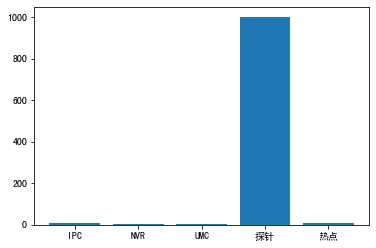

In [20]:
fig, ax = plt.subplots()
ax.bar(typeInfo.index,typeInfo.values)

In [21]:
import matplotlib
matplotlib.matplotlib_fname()

'/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/matplotlibrc'

In [22]:
factoryInfo = termInfo.groupby("厂商")["终端IP"].count()
factoryInfo

厂商
大华         1
天地伟业       1
宇视         1
思博伦     1000
海康         4
融城互通       5
迪普         2
Name: 终端IP, dtype: int64

<BarContainer object of 7 artists>

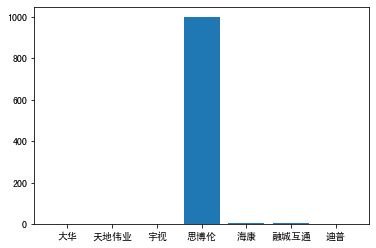

In [23]:
fig, ax = plt.subplots()
ax.bar(factoryInfo.index,factoryInfo.values)

In [24]:
df = pd.read_csv("/home/lifengchao/下载/term.csv",encoding="gbk")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 8 columns):
终端IP    1014 non-null object
设备IP    1014 non-null object
厂商      1014 non-null object
终端类型    1014 non-null object
终端型号    7 non-null object
组织关系    1014 non-null object
地理位置    0 non-null float64
描述      0 non-null float64
dtypes: float64(2), object(6)
memory usage: 63.5+ KB


In [26]:
import pandas_profiling

In [27]:
pandas_profiling.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/model/correlations.py:34: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr - 1.0), (rcorr - 1.0)))
/usr/local/lib/python3.6/dist-packages/pandas_profiling/model/correlations.py:124: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The internally computed table of expected frequencies has a zero element at (0, 2).')
  correlation_name=correlation_name, error=error
/usr/local/lib/python3.6/dist-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 21378 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.6/dist-packages/matplotlib/